In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use('lateky')

import numpy as np
import pickle

In [2]:
# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield(
    6,
    0,
    0.8875,
    0.2
)

In [ ]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 10
pparams["nPpts"] = 300
pparams["zeta"] = 0

# Set RZs for the normal (R-only) computation
pparams["Rbegin"] = pyoproblem._R0+1e-3
pparams["Rend"] = 8

# Set up the Poincare plot object
pplot = PoincarePlot(pyoproblem, pparams, integrator_params=iparams)

# # R-only computation
pplot.compute()

In [ ]:
fig, ax = pplot.plot(marker=".", s=1)
# # plt.show()
# # fig.canvas.toolbar_visible = True
# fig.canvas.toolbar_visible = 'fade-in-fade-out'
# # fig.canvas.toolbar_position = 'top'
# fig.canvas.header_visible = False
# fig.canvas.footer_visible = True
# fig.canvas.resizable = False
# # fig.canvas.capture_scroll = True

# # fig.canvas.toolbar_visible = True
# display(fig.canvas)

In [ ]:
pplot.compute_iota()

In [ ]:
pplot.plot_q()
plt.show()

#### Adding the perturbation

In [3]:
maxwellboltzmann = {"m": 3, "n": -2, "d": 1.75/np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}
pyoproblem.add_perturbation(maxwellboltzmann)

0 - dr : 0.0


In [4]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 15
pparams["nPpts"] = 150
pparams["zeta"] = 0

# Set RZs for the normal (R-only) computation
pparams["Rbegin"] = pyoproblem._R0+1e-3
pparams["Rend"] = 8.5

# Set up the Poincare plot object
pplot_perturbed = PoincarePlot(pyoproblem, pparams, integrator_params=iparams)

# # R-only computation
pplot_perturbed.compute()

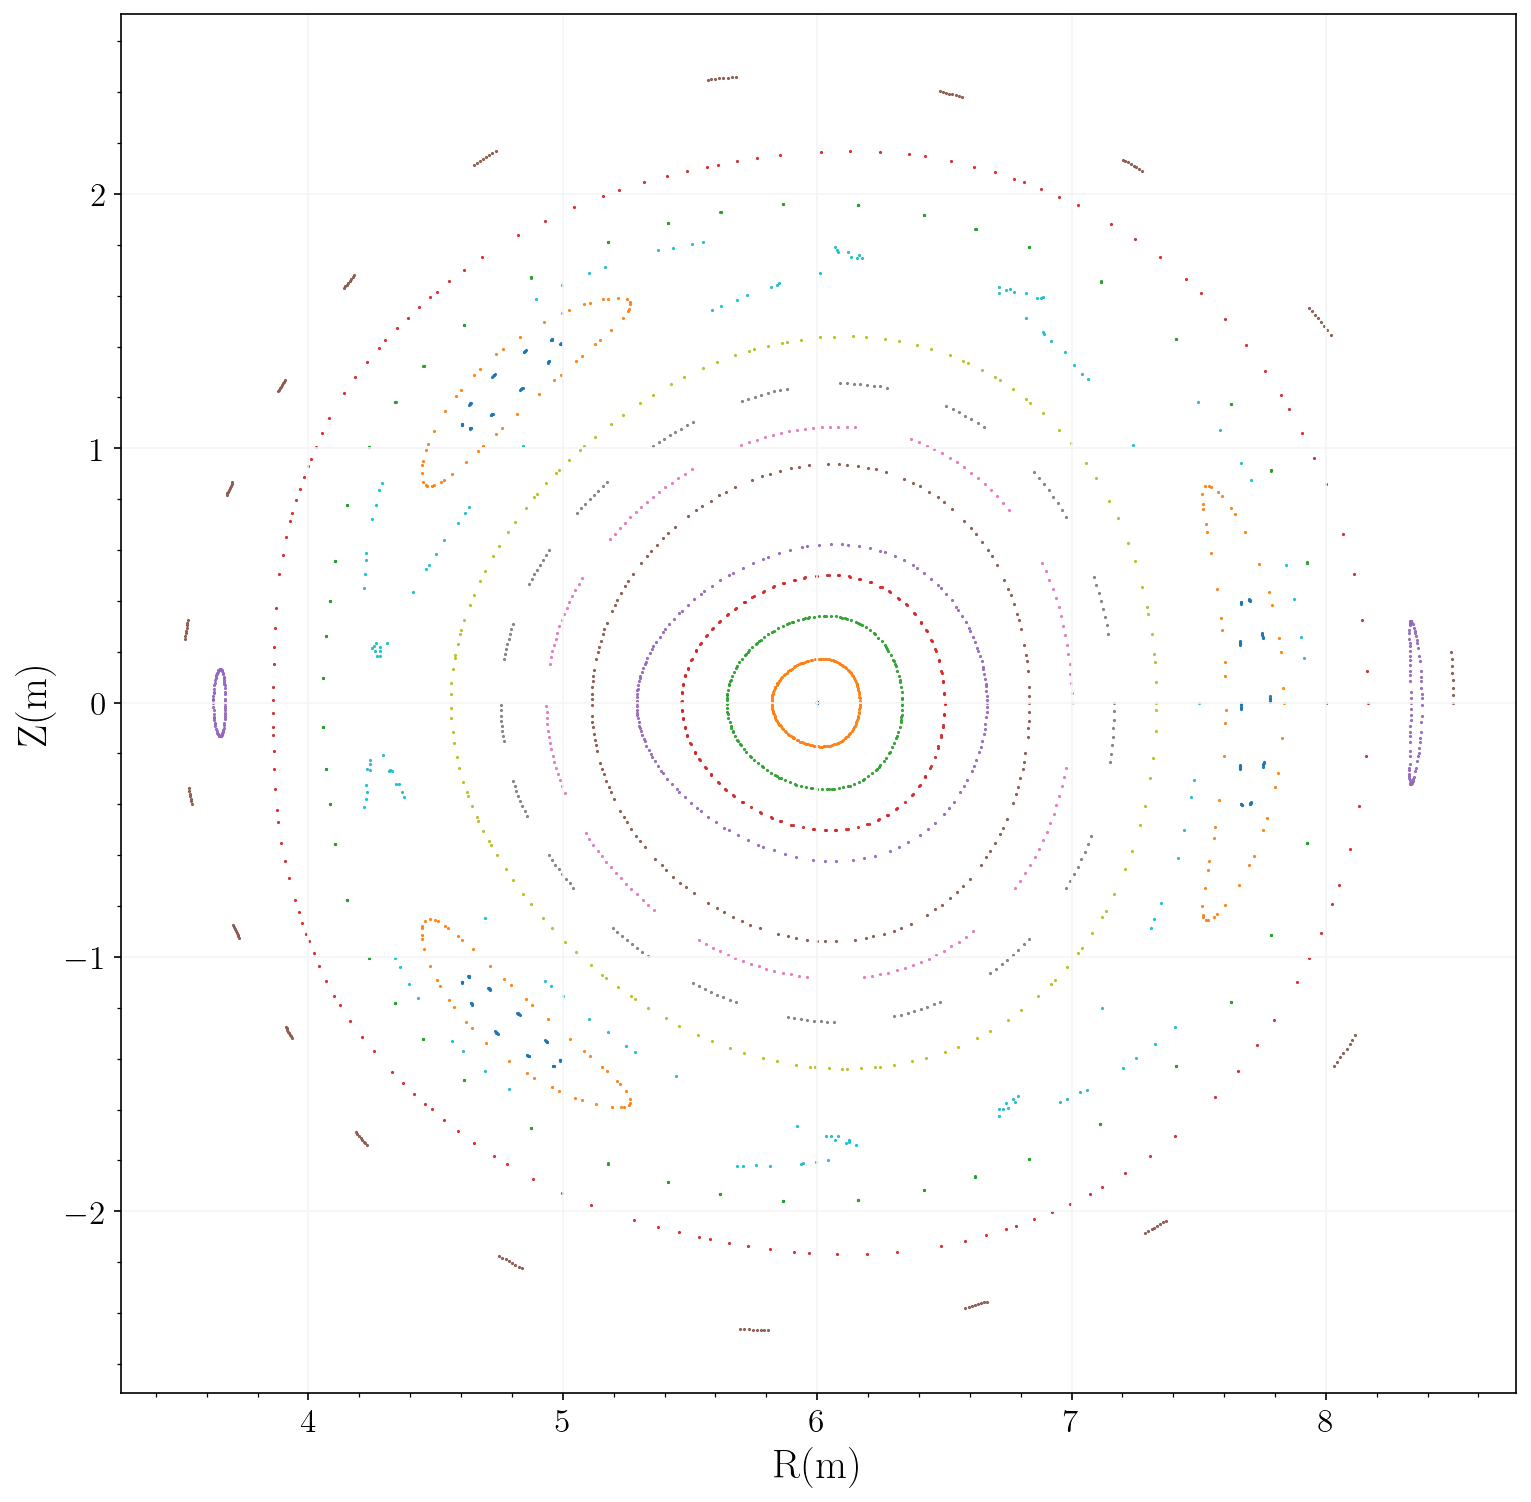

In [32]:
fig_perturbed, ax_perturbed = pplot_perturbed.plot(marker=".", s=1)
fig_perturbed

In [ ]:
pyoproblem.plot_intensities([4, 8], [-2, 2], ax=ax_perturbed, alpha=0.3)
display(fig_perturbed.canvas)

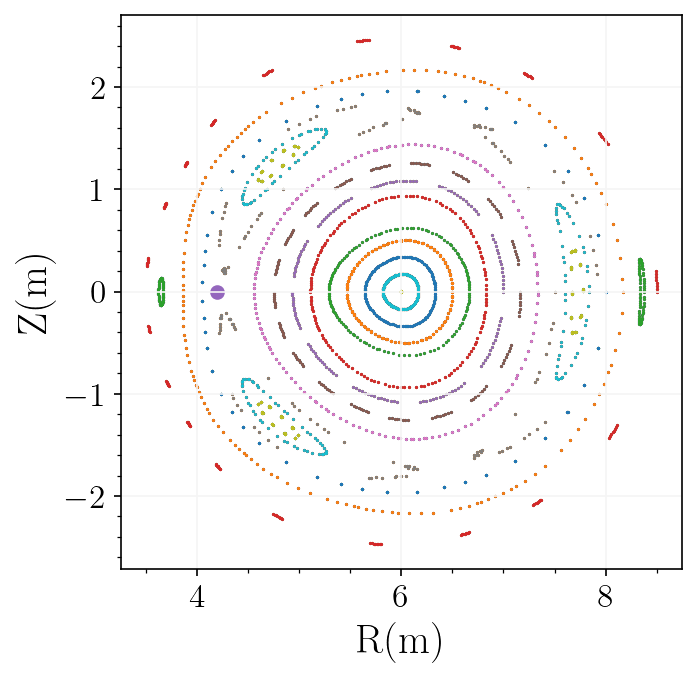

In [10]:
guess = [4.2, 0.]
ax_perturbed.scatter(*guess)
fig_perturbed

In [11]:
# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300
pparams['Z'] = 0

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
fixedpoint.compute(guess=guess, pp=2, qq=3, sbegin=2, send=10, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

[R,Z] : [4.231182461608909, 0.7243696603064351] - dtheta : -0.3886879336100808
R : 4.2672313458086135
[R,Z] : [4.292285982165341, -0.11460704118109455] - dtheta : 0.0670108943881278
R : 4.258557213354744
[R,Z] : [4.258843455343295, -0.0015552057510422827] - dtheta : 0.0008932024763197433
R : 4.258438345127808
[R,Z] : [4.258438404010944, -3.2074168027432237e-07] - dtheta : 1.8416896985229414e-07
R : 4.258438320608314
[R,Z] : [4.2584383206095255, -7.238654120556021e-14] - dtheta : -5.329070518200751e-15


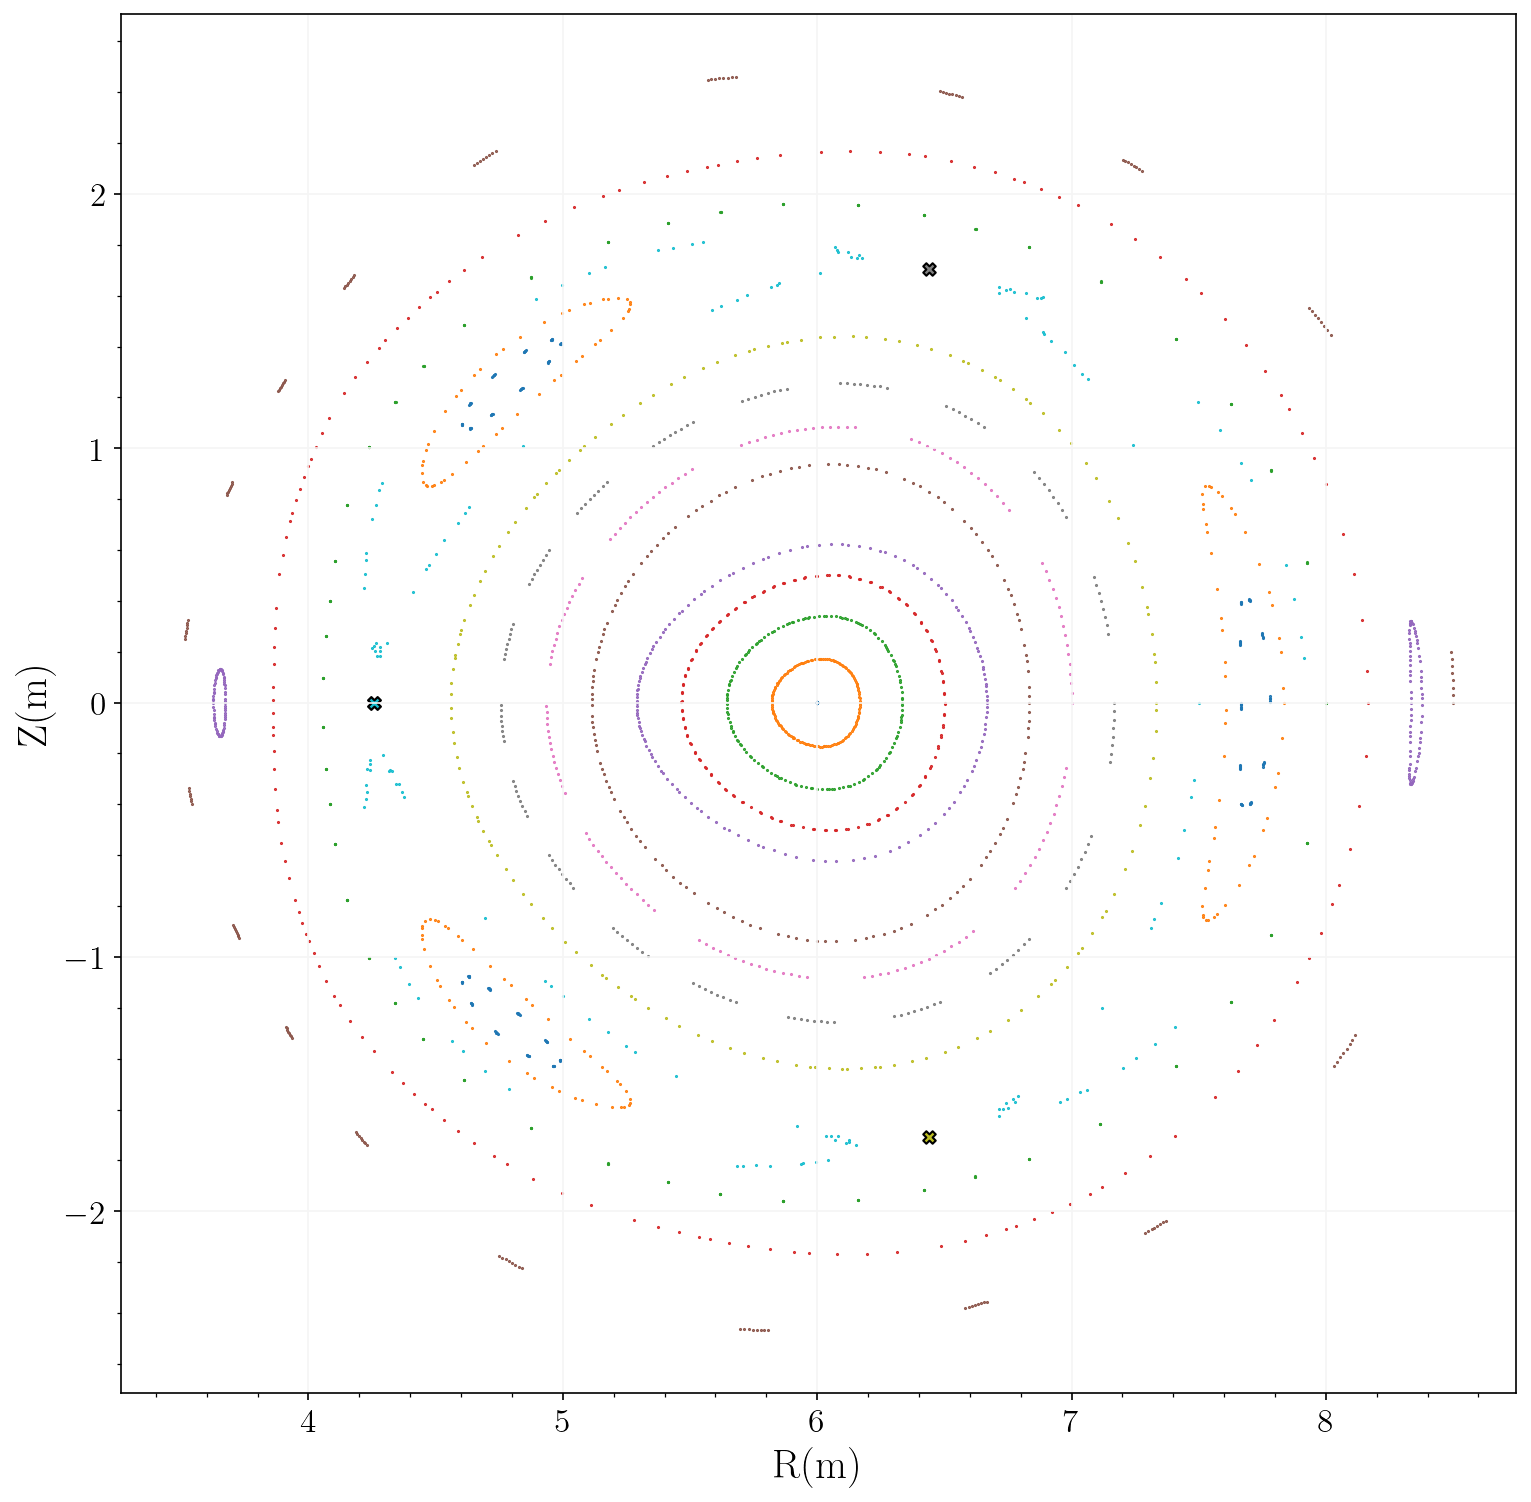

In [33]:
results
for rr in results:
    ax_perturbed.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)
fig_perturbed

In [ ]:
ax_perturbed.set_title("Perturbed Poincare plot")
fig_perturbed

In [20]:
# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

In [21]:
manifold.choose(0, 1, sngs=[-1, 1])

In [22]:
manifold.compute(neps=100, nintersect=8)

2024-05-22 18:08:37 [info     ] Search for minimum of the linear error succeeded, epsilon = 4.08666e-07
2024-05-22 18:08:38 [info     ] Search for minimum of the linear error succeeded, epsilon = 5.13748e-07
2024-05-22 18:08:38 [info     ] Computing unstable manifold with postive epsilon...
2024-05-22 18:10:34 [info     ] Computing stable manifold with positive epsilon...


In [34]:
manifold.plot(ax=ax_perturbed)

2024-05-22 18:52:12 [warning  ] Manifold u- not computed.
2024-05-22 18:52:12 [warning  ] Manifold s- not computed.


(<Figure size 1800x1800 with 1 Axes>, <Axes: xlabel='R(m)', ylabel='Z(m)'>)

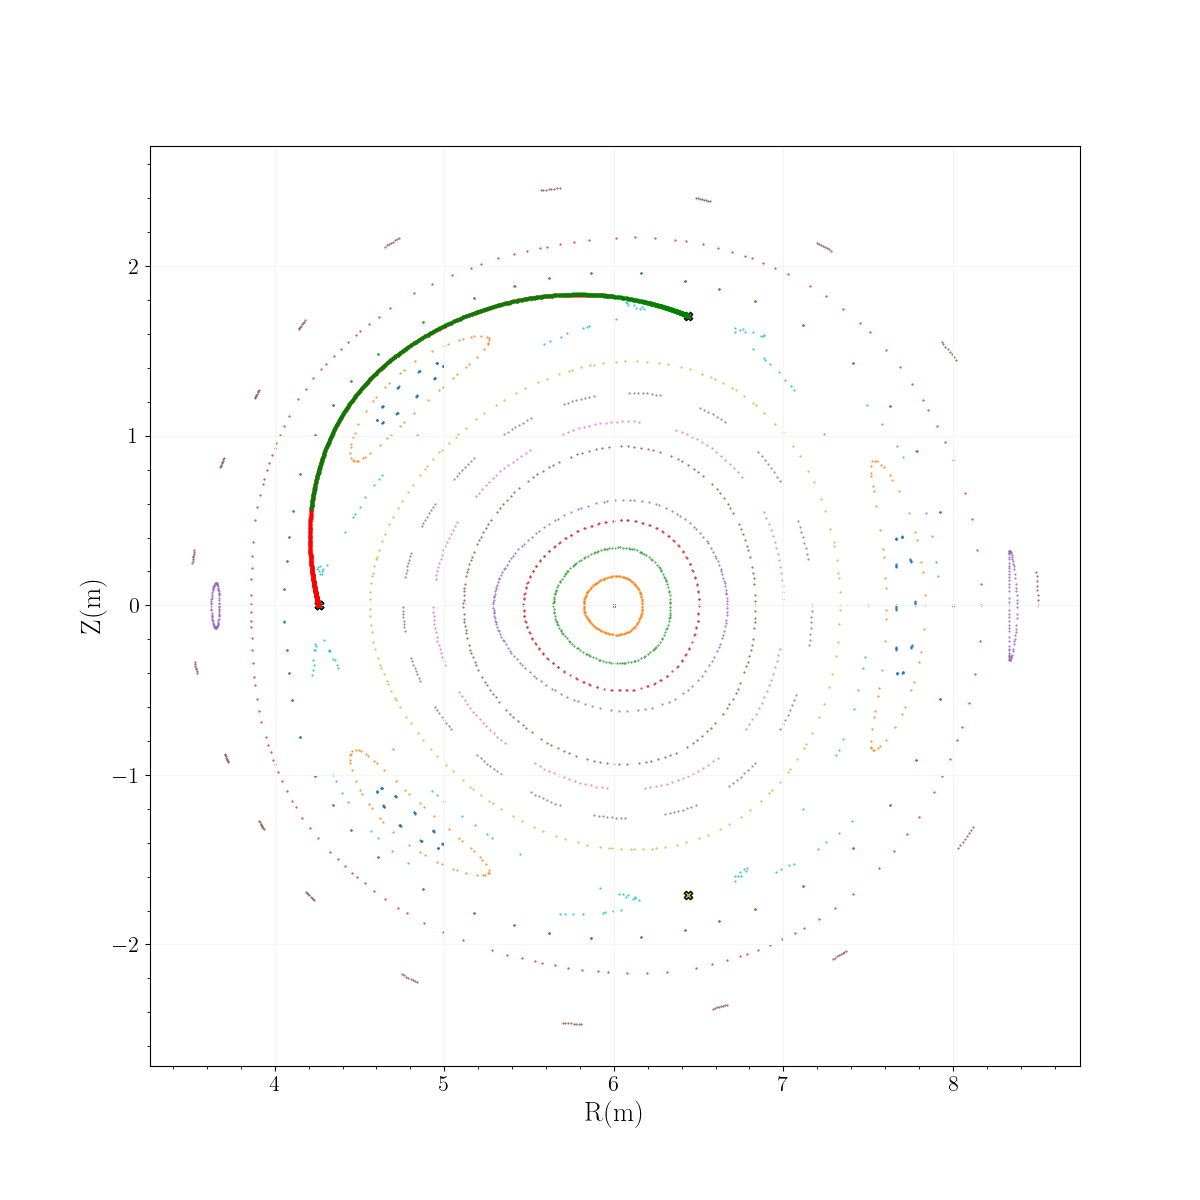

In [35]:
display(fig_perturbed.canvas)

In [25]:
manifold.find_clinics(n_points=4)

2024-05-22 18:14:18 [info     ] Search for minimum of the linear error succeeded, epsilon = 4.14503e-07
2024-05-22 18:14:19 [info     ] Search for minimum of the linear error succeeded, epsilon = 5.08304e-07
2024-05-22 18:14:21 [debug    ] Guess - 1.1714616116793982e-06, 1.4365950691705617e-06
2024-05-22 18:14:21 [debug    ] Bounds - ((4.1450321820348954e-07, 2.757426441562286e-06), (5.083038638263622e-07, 3.3814940021674853e-06))
2024-05-22 18:14:21 [debug    ] n_s, n_u - 8, 8
2024-05-22 18:14:21 [debug    ] Inside : (1.1714616116793985e-06, 1.4365950691705617e-06)
2024-05-22 18:14:22 [debug    ] Returns - (array([4.40036659, 1.12565833]), array([5.43242354, 1.79855191]), array([-1.03205695, -0.67289358]))
2024-05-22 18:14:22 [debug    ] Inside : (1.1714616116793985e-06, 1.4365950691705617e-06)
2024-05-22 18:14:24 [debug    ] Returns - (array([4.40036659, 1.12565833]), array([5.43242354, 1.79855191]), array([-1.03205695, -0.67289358]))
2024-05-22 18:14:24 [debug    ] Inside : (1.17146

In [26]:
manifold.clinics

[(7.454212182510206e-07,
  6.064022282825246e-07,
  7.454212182510206e-07,
  array([4.84238907, 1.5597934 ]),
  array([4.84238907, 1.5597934 ])),
 (1.191278045762976e-06,
  2.499532321845216e-06,
  1.1912780458234376e-06,
  array([4.22331591, 0.62383693]),
  array([4.22331591, 0.62383693])),
 (1.9226210681710835e-06,
  1.564040857261013e-06,
  1.9226210681372958e-06,
  array([4.30239459, 0.92510796]),
  array([4.30239459, 0.92510797])),
 (3.0725965572485293e-06,
  9.69101732243161e-07,
  3.0725965572774013e-06,
  array([4.49650578, 1.25928438]),
  array([4.49650578, 1.25928438]))]

In [ ]:
r1 = manifold.integrate_single(manifold.rfp_u + 0.1 * manifold.vector_u, 56, 1, ret_jacobian=False)
r2 = manifold.integrate_single(manifold.rfp_s + 0.1 * manifold.vector_s, 57, -1, ret_jacobian=False)

In [ ]:
ax_perturbed.scatter(*r1, marker="o", edgecolors="black", linewidths=1)
ax_perturbed.scatter(*r2, marker="s", edgecolors="black", linewidths=1)

In [ ]:
display(fig_perturbed.canvas)

In [ ]:
print(manifold.error_linear_regime(0.001, manifold.rfp_u, manifold.vector_u))
print(manifold.error_linear_regime(0.001, manifold.rfp_s, manifold.vector_s, direction=-1))

In [ ]:
manifold.find_N(1e-3, 1e-3)

In [ ]:
manifold.find_homoclinic(9.690951179619085e-07, 4.6186933097797397e-07)

In [ ]:
manifold.find_clinics(n_points = 6)

In [ ]:
fund = manifold.fundamental_segment

In [ ]:
length = np.array([si[1]-si[0] for si in fund])

In [ ]:
length*np.power(manifold.lambda_u, 28)

In [ ]:
manifold.find_clinics(n_points=4)

In [ ]:
manifold.clinics

In [36]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_u = 8
    
    # hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10)
    ax_perturbed.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

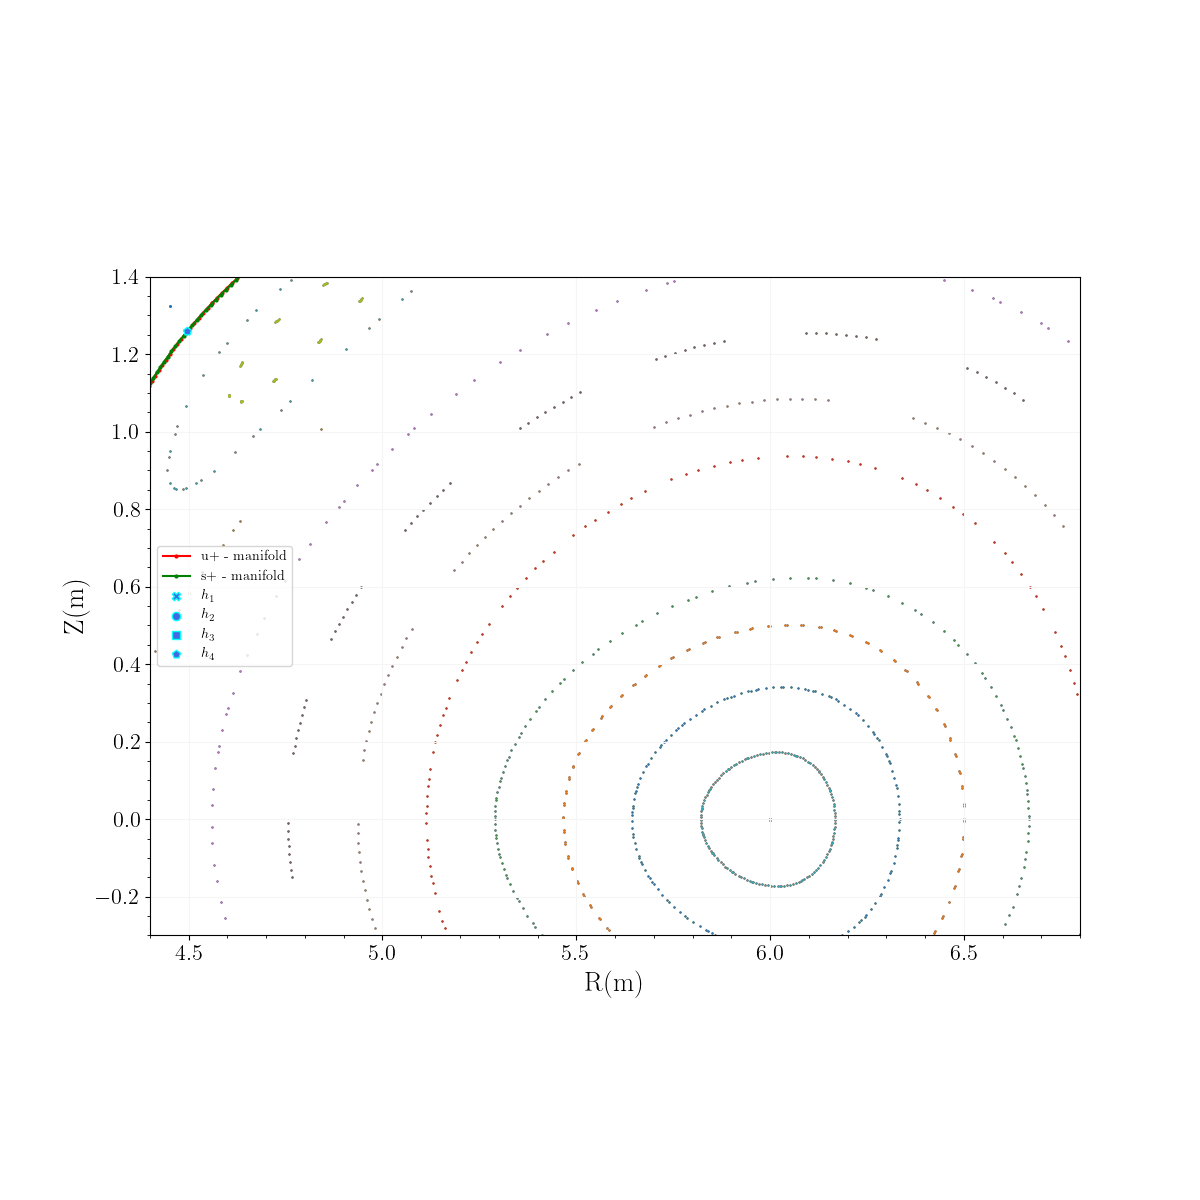

In [28]:
fig_perturbed.set_size_inches(12, 12)
# ax_perturbed.set_xlim(4.4, 6.8)
# ax_perturbed.set_ylim(-0.3, 1.4)
ax_perturbed.legend()
display(fig_perturbed.canvas)

In [37]:
manifold.resonance_area()

2024-05-22 18:52:48 [info     ] Forward integration goes beyond stable saddle point.
2024-05-22 18:52:48 [debug    ] rfp: [6.44042536 1.70650497], rz_end: [6.44041349 1.70650584], rz: [6.44041993 1.7065066 ]
2024-05-22 18:52:49 [info     ] Backward integration goes beyond stable saddle point.
2024-05-22 18:52:49 [debug    ] rfp: [4.25843832 0.        ], rz_end: [4.25844056e+00 1.04635431e-05], rz: [4.25843749e+00 6.27663175e-06]
2024-05-22 18:52:49 [info     ] Potential integration completed for homo/hetero-clinic point of order : 7.454e-07
2024-05-22 18:52:51 [info     ] Forward integration goes beyond stable saddle point.
2024-05-22 18:52:51 [debug    ] rfp: [6.44042536 1.70650497], rz_end: [6.4403817  1.70650756], rz: [6.44041654 1.70650629]
2024-05-22 18:52:53 [info     ] Backward integration goes beyond stable saddle point.
2024-05-22 18:52:53 [debug    ] rfp: [4.25843832 0.        ], rz_end: [4.25844300e+00 1.91730096e-05], rz: [4.25843874e+00 4.01203378e-06]
2024-05-22 18:52:53 

(array([-0.00151043,  0.00146798, -0.00146037,  0.00147953]),
 [[array([17.10666116, 12.43838924, 11.56847509, 11.44419281, 11.42571121,
          11.42293716, 11.42251609]),
   array([-14.23699747, -11.39572734, -11.42071584, -11.42240457,
          -11.42244643, -11.42244739, -11.42244741])],
  [array([16.26710392, 15.50126737, 12.04169017, 11.51255623, 11.43591215,
          11.42446912, 11.42274842, 11.42247374]),
   array([-11.43435912, -11.4183262 , -11.422339  , -11.42244491,
          -11.42244735, -11.42244741, -11.42244741])],
  [array([17.6999907 , 14.08671272, 11.80498274, 11.47868594, 11.43086927,
          11.42371208, 11.42263374, 11.42245046]),
   array([-11.69949118, -11.41301943, -11.42216927, -11.42244091,
          -11.42244726, -11.4224474 , -11.42244741])],
  [array([18.0524048 , 13.07097522, 11.65726354, 11.45723522, 11.42766429,
          11.42323064, 11.42256062]),
   array([-12.54406294, -11.40366551, -11.4217542 , -11.42243087,
          -11.42244703, -11.422

In [39]:
manifold.areas

array([[-1.51042732e-03,  4.23430938e-05,  3.81996276e-05],
       [ 1.46797972e-03,  2.32884255e-05,  4.26025353e-06],
       [-1.46037239e-03,  1.10160572e-04,  1.18733490e-05],
       [ 1.47953160e-03,  4.45297595e-05,  7.29814197e-06]])

In [40]:
areas = manifold.areas[:,0]
areas[areas > 0].sum()

0.0029475113253170093

In [42]:
areas.sum()

-2.328838013454515e-05

In [45]:
np.isclose(areas.sum(), 0, atol=1e-2*np.abs(areas).max())

False

In [15]:
eps_s_lb = manifold.find_epsilon(manifold.rfp_s, manifold.vector_s, direction=-1)
eps_u_lb = manifold.find_epsilon(manifold.rfp_u, manifold.vector_u)

2024-05-22 18:06:22 [info     ] Search for minimum of the linear error succeeded, epsilon = 4.14503e-07
2024-05-22 18:06:23 [info     ] Search for minimum of the linear error succeeded, epsilon = 5.08304e-07


In [ ]:
bounds = manifold.find_bounds(eps_s_lb, eps_u_lb)

In [16]:
n_s, n_u = manifold.find_N(eps_s_lb, eps_u_lb)
print(n_s, n_u)

9 8


In [ ]:
space_u = np.logspace(
            np.log(bounds[1][0]) / np.log(manifold.lambda_u),
            np.log(bounds[1][1]) / np.log(manifold.lambda_u),
            20,
            base=manifold.lambda_u,
        )

space_s = np.logspace(
            np.log(bounds[0][0]) / np.log(manifold.lambda_s),
            np.log(bounds[0][1]) / np.log(manifold.lambda_s),
            20,
            base=manifold.lambda_s,
        )

In [ ]:
n_s, n_u = 16, 16
def evolution(self, eps):
    print(eps)
    eps_s, eps_u = eps
    r_s = self.rfp_s + eps_s * self.vector_s
    r_u = self.rfp_u + eps_u * self.vector_u

    try:
        r_s_evolved = self.integrate_single(r_s, n_s, -1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in stable manifold integration : {e}")

    try:
        r_u_evolved = self.integrate_single(r_u, n_u, 1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in unstable manifold integration : {e}")

    return r_s_evolved - r_u_evolved

es, eu = np.meshgrid(space_s, space_u)
E = np.array([evolution(manifold, [S, U]) for S, U in zip(es.flatten(), eu.flatten())]).reshape(es.shape + (2,))

In [ ]:
N = np.linalg.norm(E, axis=2)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot()
contour = ax.contourf(es, eu, N)
plt.colorbar(contour)

# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(es, eu, N, cmap='viridis')

In [ ]:
n_s = 17
n_u = 16

def iteration(eps_u):
    r_s_E, intA = manifold.integrate_single(manifold.rfp_u + eps_u * manifold.vector_u, n_s+n_u-1, 1, ret_jacobian=False, integrate_A=True)
    ax.scatter(*r_s_E, s=15, edgecolor='black', zorder=10)
    # r_dir = r_s_E - manifold.rfp_s
    # r_dir = r_dir / np.linalg.norm(r_dir)
    return intA

In [ ]:
space = np.linspace(bounds[1][0], bounds[1][1], 100)

In [ ]:
arr = []
for eps in space:
    arr.append(iteration(eps))

In [ ]:
fig, ax = plt.subplots()
ax.plot(space, arr)